In [21]:
#  Git link: https://github.com/dayanaviana/WGU/tree/main/D212-DataMiningII

In [22]:
from platform import python_version
("Pyhton version:", python_version())

('Pyhton version:', '3.14.1')

## Imports

In [23]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
filePath = "../datasources/churn.csv"
df = pd.read_csv(filePath, index_col=False)

In [25]:
### Select continuous features
continuous_features = df.select_dtypes(include=['int64','float64']).columns.to_list()
print("\ncontinuous_features: ", continuous_features)


continuous_features:  ['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']


In [26]:
### Remove features
df_reduced = df[continuous_features]
df_reduced = df_reduced.drop(columns=['CaseOrder','Zip', 'Lat', 'Lng', 'Children', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            10000 non-null  int64  
 1   Age                   10000 non-null  int64  
 2   Income                10000 non-null  float64
 3   Outage_sec_perweek    10000 non-null  float64
 4   Email                 10000 non-null  int64  
 5   Contacts              10000 non-null  int64  
 6   Yearly_equip_failure  10000 non-null  int64  
 7   Tenure                10000 non-null  float64
 8   MonthlyCharge         10000 non-null  float64
 9   Bandwidth_GB_Year     10000 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 781.4 KB


## Data Exploration

In [27]:
df_reduced.head()

,Population,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,38,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110
1,10446,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766
2,3735,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961
3,13863,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412
4,11352,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436


In [28]:
df_reduced.describe().round(2)

,Population,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,9756.56,53.08,39806.93,10.00,12.02,0.99,0.40,34.53,172.62,3392.34
std,14432.70,20.70,28199.92,2.98,3.03,0.99,0.64,26.44,42.94,2185.29
min,0.00,18.00,348.67,0.10,1.00,0.00,0.00,1.00,79.98,155.51
25%,738.00,35.00,19224.72,8.02,10.00,0.00,0.00,7.92,139.98,1236.47
50%,2910.50,53.00,33170.60,10.02,12.00,1.00,0.00,35.43,167.48,3279.54
75%,13168.00,71.00,53246.17,11.97,14.00,2.00,1.00,61.48,200.73,5586.14
max,111850.00,89.00,258900.70,21.21,23.00,7.00,6.00,72.00,290.16,7158.98


# Visualize Correlations

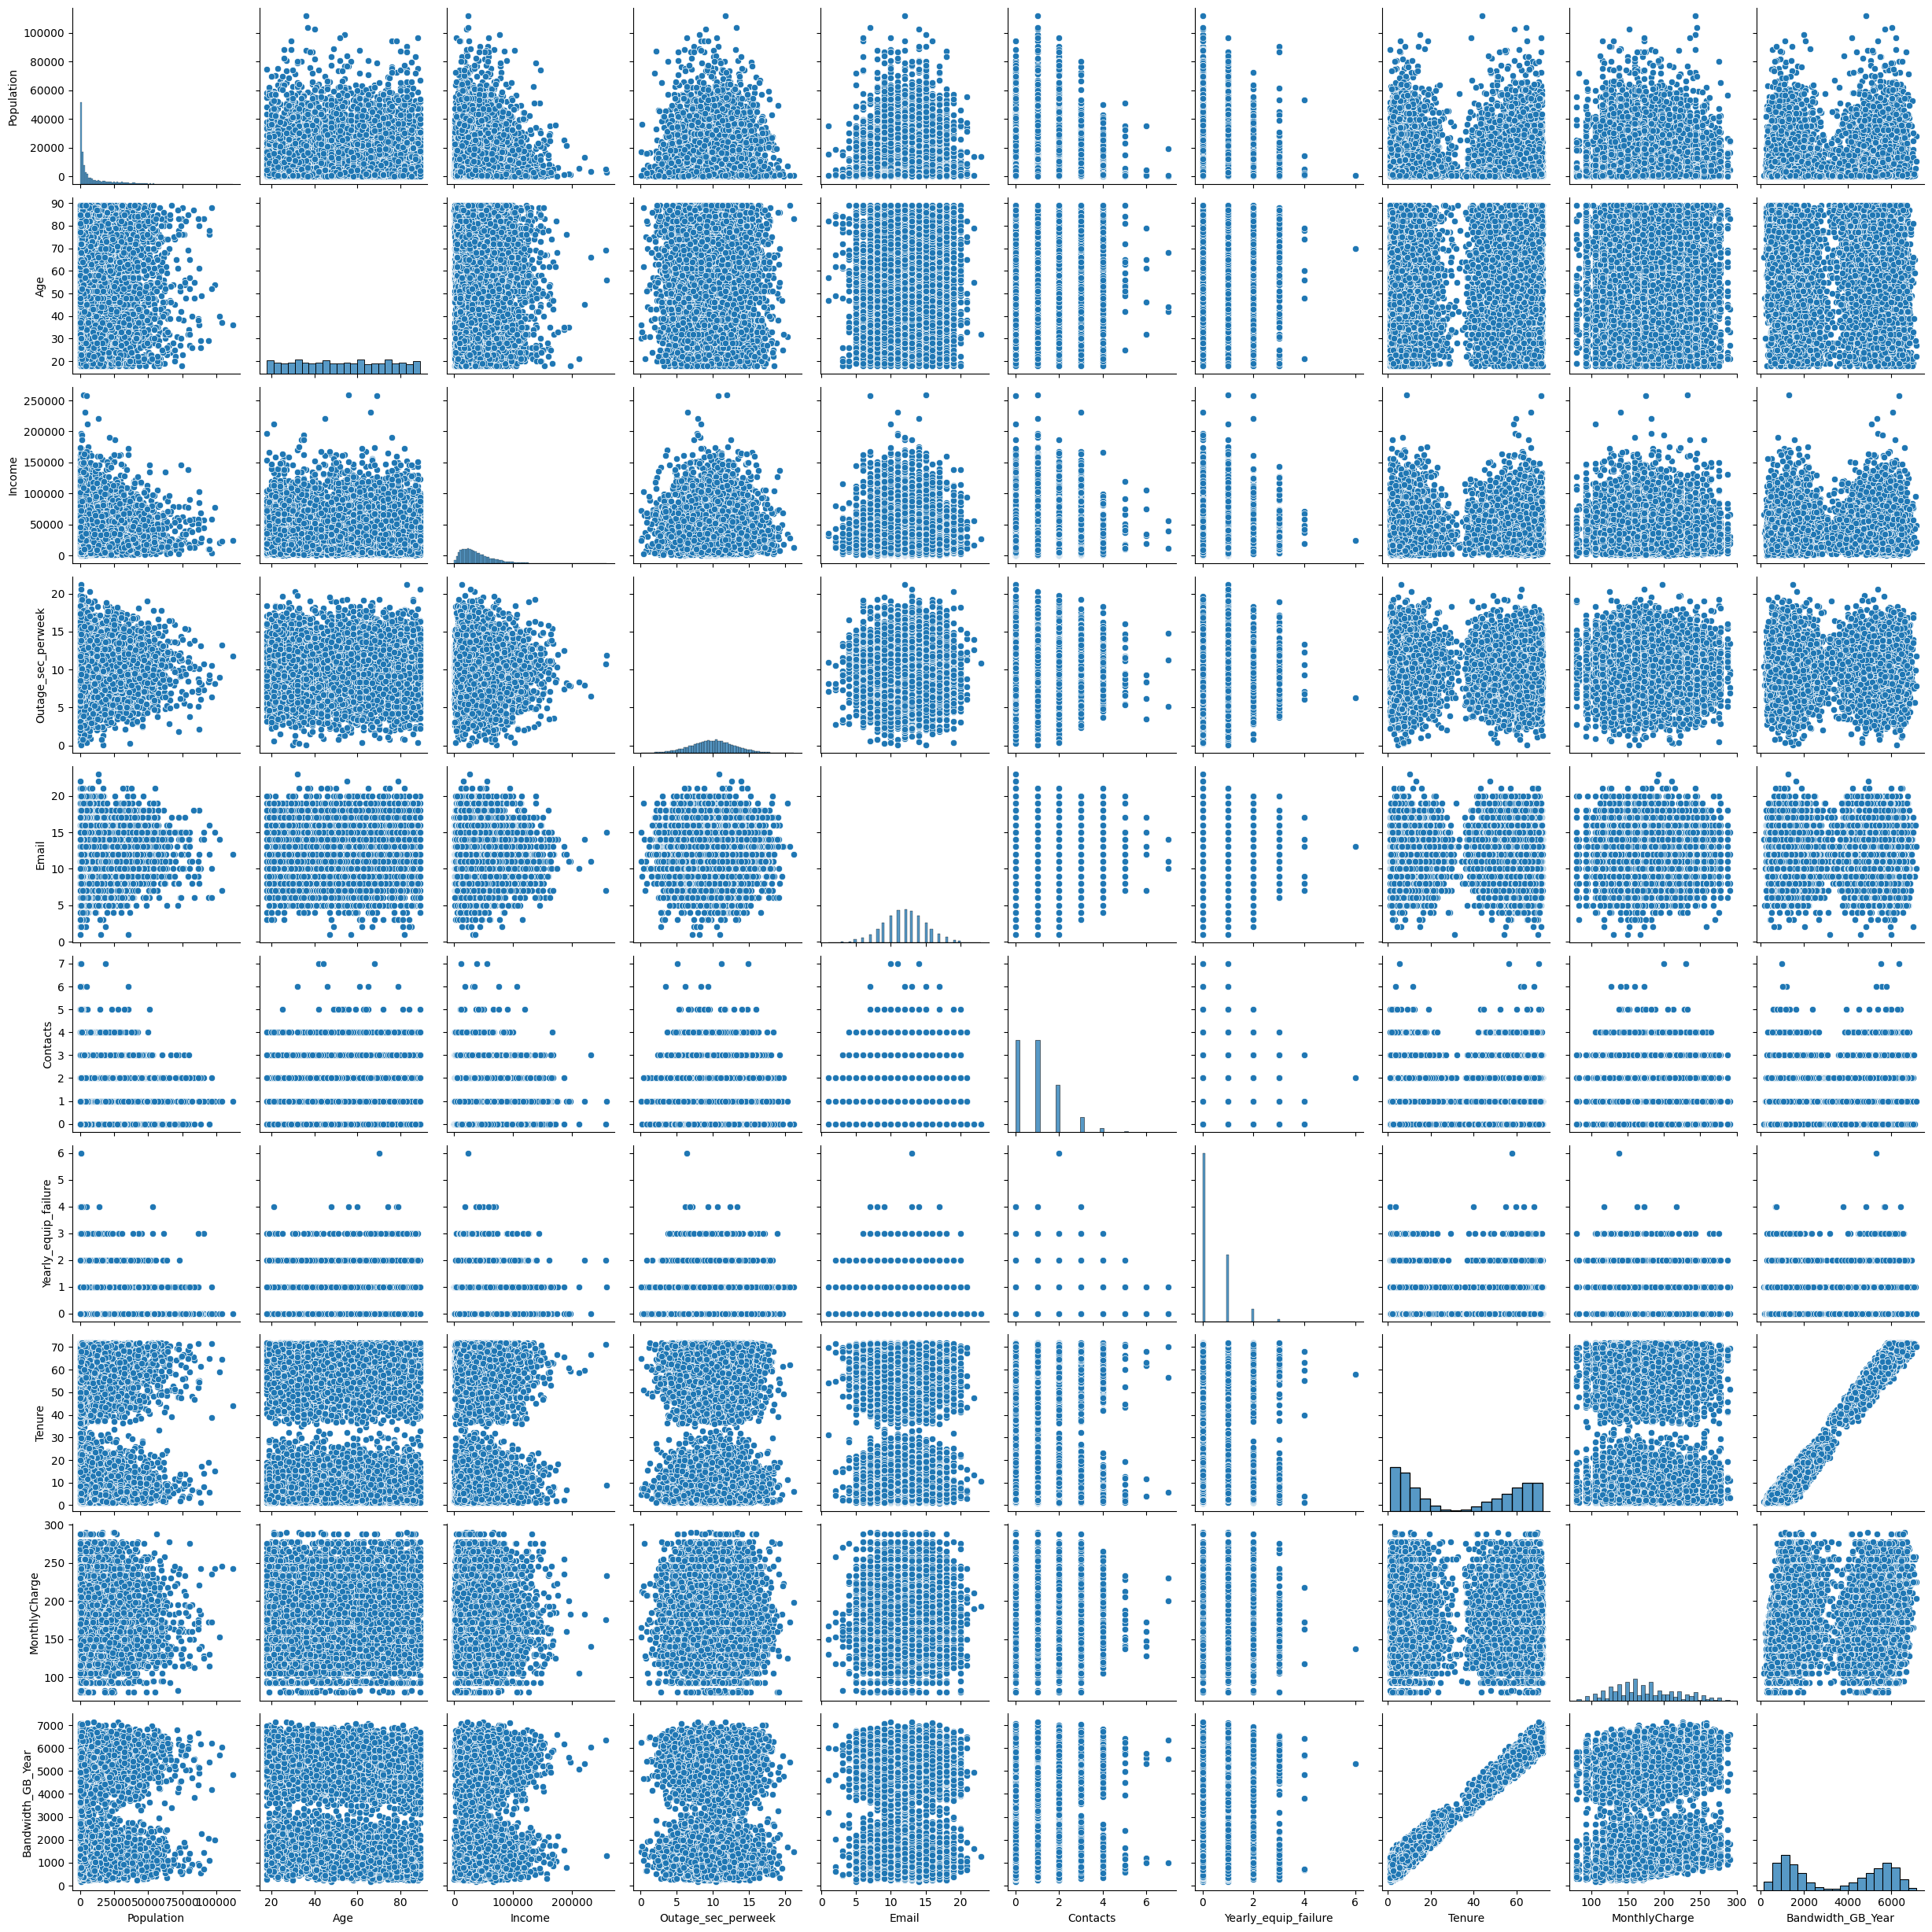

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_reduced)  # for small datasets

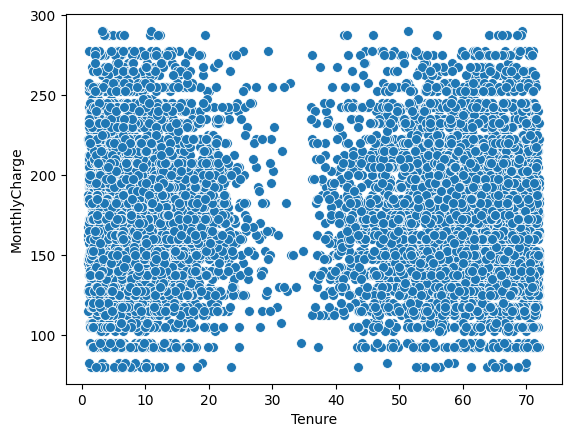

In [30]:
ax = sns.scatterplot(data = df_reduced,
                     x = 'Tenure',
                     y = 'MonthlyCharge',
                     s = 50
                     )

## Data Preprocessing

In [31]:
# SCALING: Normalize data using z-score from sklearn StandardScaler

# https://www.w3schools.com/python/python_ml_scale.asp
 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 

# Scale numeric data
a_ndarray = scaler.fit_transform(df_reduced) 

# Transform array into a Data Frame
df_standardized = pd.DataFrame(a_ndarray, columns=df_reduced.columns)

# Clear variables
del scaler, a_ndarray, 

df_standardized.describe().round(2)

,Population,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.68,-1.69,-1.40,-3.33,-3.64,-1.01,-0.63,-1.27,-2.16,-1.48
25%,-0.62,-0.87,-0.73,-0.67,-0.67,-1.01,-0.63,-1.01,-0.76,-0.99
50%,-0.47,-0.00,-0.24,0.01,-0.01,0.01,-0.63,0.03,-0.12,-0.05
75%,0.24,0.87,0.48,0.66,0.66,1.02,0.95,1.02,0.65,1.00
max,7.07,1.74,7.77,3.77,3.63,6.08,8.81,1.42,2.74,1.72


In [32]:
# Write normalized data to file
df_standardized.to_csv("df_normalized.csv")

## KMeans

In [33]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, n_init=25, random_state=35)
model.fit(df_standardized)

,n_clusters,2
,init,'k-means++'
,n_init,25
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,35
,copy_x,True
,algorithm,'lloyd'


## Evaluate

In [34]:
evaluate = pd.Series(model.labels_).value_counts()
evaluate

1    5001
0    4999
Name: count, dtype: int64

In [35]:
# Create and visualize centroids
centroid = pd.DataFrame(model.cluster_centers_, columns=df_standardized.columns)
centroid

,Population,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,0.000038,0.019379,0.002481,0.003104,-0.011767,0.004047,0.008933,0.960660,-0.001786,0.952303
1,-0.000038,-0.019371,-0.002480,-0.003103,0.011762,-0.004045,-0.008930,-0.960276,0.001785,-0.951922


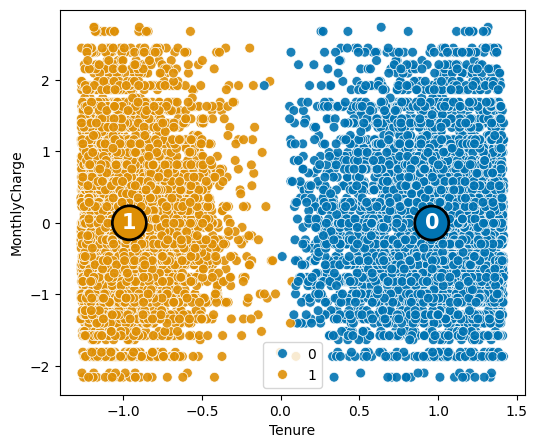

In [36]:
plt.figure(figsize=(6,5))

ax = sns.scatterplot(data = df_standardized,
                     x = 'Tenure',
                     y = 'MonthlyCharge',
                     hue = model.labels_,
                     palette= 'colorblind',
                     alpha = 0.9,
                     s = 50,
                     legend = True
                     )
ax  = sns.scatterplot(data = centroid,
                     x = 'Tenure',
                     y = 'MonthlyCharge',
                     hue = centroid.index,
                     palette= 'colorblind',
                     s = 600,
                     markers='D',
                     ec = 'black',
                     legend = False
                     )
for i in range(len(centroid)):
    plt.text(
        x = centroid.Tenure[i],
        y = centroid.MonthlyCharge[i],
        s = i,
        horizontalalignment='center',
        verticalalignment='center',
        size = 15,
        weight = 'bold',
        color = 'white'
    )

## Check optimal values for k

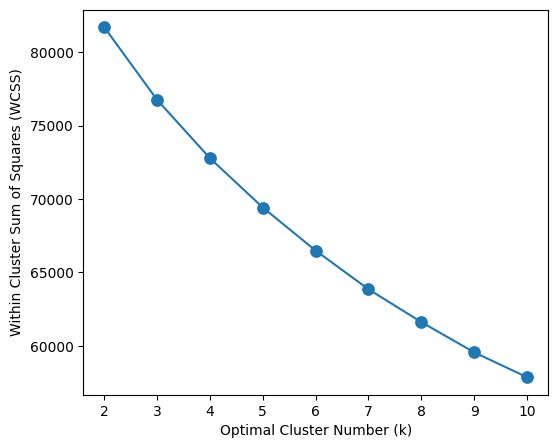

In [37]:
wcss = []
for k in range (2, 11):
    model = KMeans(n_clusters=k, n_init=50, random_state=35)
    model.fit(df_standardized)
    wcss.append(model.inertia_)
wcss_s = pd.Series(wcss, index = range(2,11))

plt.figure(figsize=(6,5))
ax = sns.lineplot(y=wcss_s, x=wcss_s.index)
ax = sns.scatterplot(y=wcss_s, x=wcss_s.index, s=100)
ax = ax.set(xlabel='Optimal Cluster Number (k)',
            ylabel='Within Cluster Sum of Squares (WCSS)'
            )


In [38]:
# SILHOUETTE SCORE : Determines the quality of the cluster
# [-1,1]: -1 means data is not similar, 0 is neutral, for 1 data is more similar
from sklearn.metrics import silhouette_score
silhouette_score_value = silhouette_score(df_standardized, model.labels_)
silhouette_score_value

0.09928826766515603

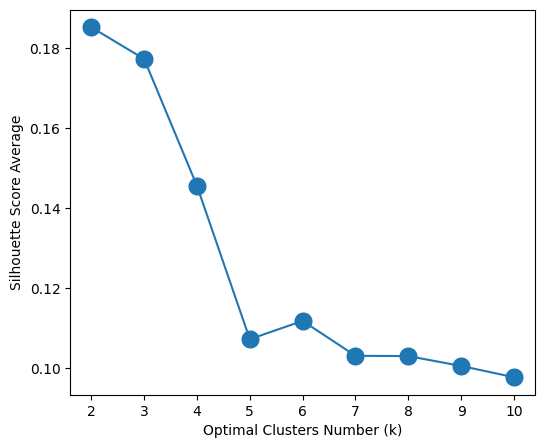

In [39]:
silhouette = []
for k in range(2,11):
    model = KMeans(n_clusters=k, n_init=25, random_state=35)
    model.fit(df_standardized)
    item = silhouette_score(X=df_standardized, labels=model.labels_)
    silhouette.append(item)
    
silhouette_s = pd.Series(silhouette, index=range(2,11))

plt.figure(figsize=(6, 5))
ax = sns.lineplot(y= silhouette_s, x=silhouette_s.index)
ax = sns.scatterplot(y= silhouette_s, x=silhouette_s.index, s=200)
ax = ax.set(xlabel = 'Optimal Clusters Number (k)',
            ylabel= 'Silhouette Score Average')
            

## Analyze and interpret results